# Android Games EDA

## 1. Settings

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
games_df = pd.read_csv("android-games.csv")
games_df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False


### < 목적/ 가설 설정 >

**사용자 & ratings가 많을수록 평점이 떨어질 것이다.**     

++ 가장 인기있는 카데고리 찾기 (다운로드수, 평점)


## 2. Analyzing Basics

In [5]:
## datatype, count 확인하기

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [16]:
## #각 컬럼별 결측값 확인하기 -> 결과: 없음 

games_df.isnull().sum()  

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

## 3. Analyzing in Depth

In [17]:
## 상관관계 알아보기

games_df.corr()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
rank,1.000000,-0.323722,-0.077549,0.018650,0.054355,-0.011992,-0.313823,-0.382226,-0.371392,-0.333281,-0.278860,0.013114
total ratings,-0.323722,1.000000,0.020131,-0.003809,-0.021878,0.007181,0.998297,0.943321,0.972468,0.970013,0.942949,-0.003972
average rating,-0.077549,0.020131,1.000000,-0.002992,0.038840,0.055840,0.038269,0.033110,-0.025311,-0.067785,-0.082089,0.063805
growth (30 days),0.018650,-0.003809,-0.002992,1.000000,-0.005652,-0.002145,-0.003898,-0.007498,-0.006078,-0.003349,0.001168,-0.002569
growth (60 days),0.054355,-0.021878,0.038840,-0.005652,1.000000,-0.005532,-0.019973,-0.033939,-0.033208,-0.024227,-0.016964,-0.007746
price,-0.011992,0.007181,0.055840,-0.002145,-0.005532,1.000000,0.009724,0.001016,-0.001908,-0.000721,-0.000930,0.835636
5 star ratings,-0.313823,0.998297,0.038269,-0.003898,-0.019973,0.009724,1.000000,0.935156,0.960911,0.957325,0.931484,-0.002045
4 star ratings,-0.382226,0.943321,0.033110,-0.007498,-0.033939,0.001016,0.935156,1.000000,0.976338,0.906291,0.825907,-0.008449
3 star ratings,-0.371392,0.972468,-0.025311,-0.006078,-0.033208,-0.001908,0.960911,0.976338,1.000000,0.970886,0.911262,-0.011416
2 star ratings,-0.333281,0.970013,-0.067785,-0.003349,-0.024227,-0.000721,0.957325,0.906291,0.970886,1.000000,0.976055,-0.010192


In [23]:
### 카테고리별 평균평점 알아보기 + 내림차순 정렬

games_df.groupby(["category"])["average rating"].mean().sort_values(ascending=False)

# 결과: GAME WORD가 평균평점이 제일 높음

category
GAME WORD            4.443585
GAME CASINO          4.437800
GAME CARD            4.421066
GAME PUZZLE          4.394200
GAME BOARD           4.347100
GAME CASUAL          4.335196
GAME SIMULATION      4.318200
GAME RACING          4.312000
GAME ARCADE          4.294900
GAME ROLE PLAYING    4.276000
GAME STRATEGY        4.265000
GAME ADVENTURE       4.264200
GAME SPORTS          4.261100
GAME EDUCATIONAL     4.253600
GAME ACTION          4.246100
GAME TRIVIA          4.245700
GAME MUSIC           4.180300
Name: average rating, dtype: float64

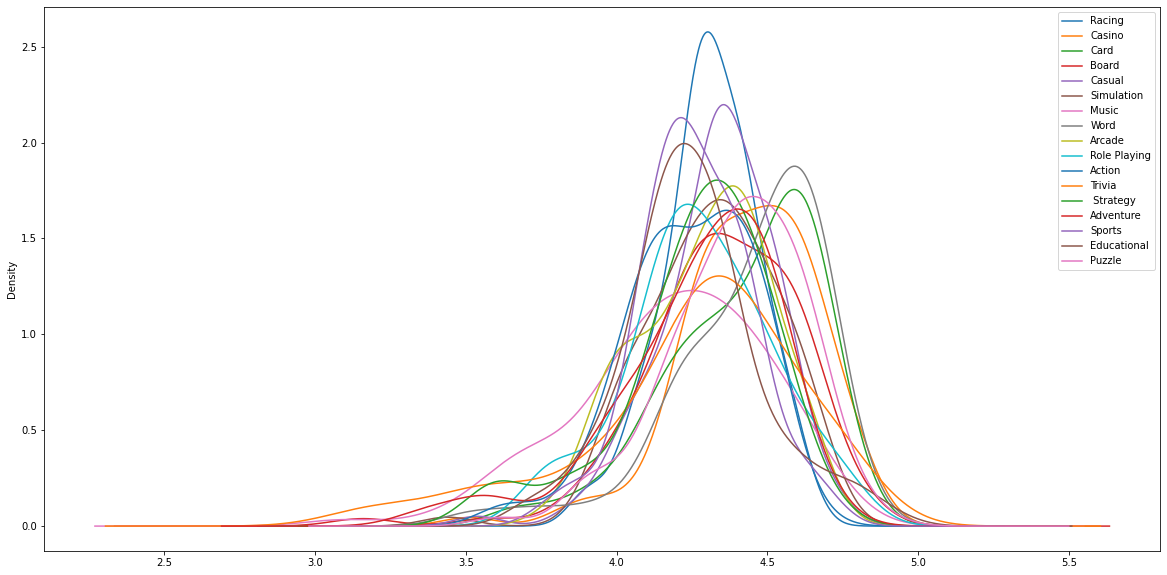

In [53]:
### 카테고리별 평균평점 분포 알아보기
### 1) kdeplot 이용

plt.figure(figsize=(20,10))

games_df['average rating'][games_df.category == 'GAME RACING'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME CASINO'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME CARD'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME BOARD'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME CASUAL'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME SIMULATION'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME MUSIC'].plot(kind='kde')
games_df['average rating'][games_df.category == 'GAME WORD'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME ARCADE'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME ROLE PLAYING'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME ACTION'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME TRIVIA'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME STRATEGY'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME ADVENTURE'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME SPORTS'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME EDUCATIONAL'].plot(kind='kde') 
games_df['average rating'][games_df.category == 'GAME PUZZLE'].plot(kind='kde') 

plt.legend(['Racing','Casino','Card','Board','Casual','Simulation','Music','Word','Arcade','Role Playing','Action','Trivia',' Strategy','Adventure','Sports','Educational','Puzzle'])

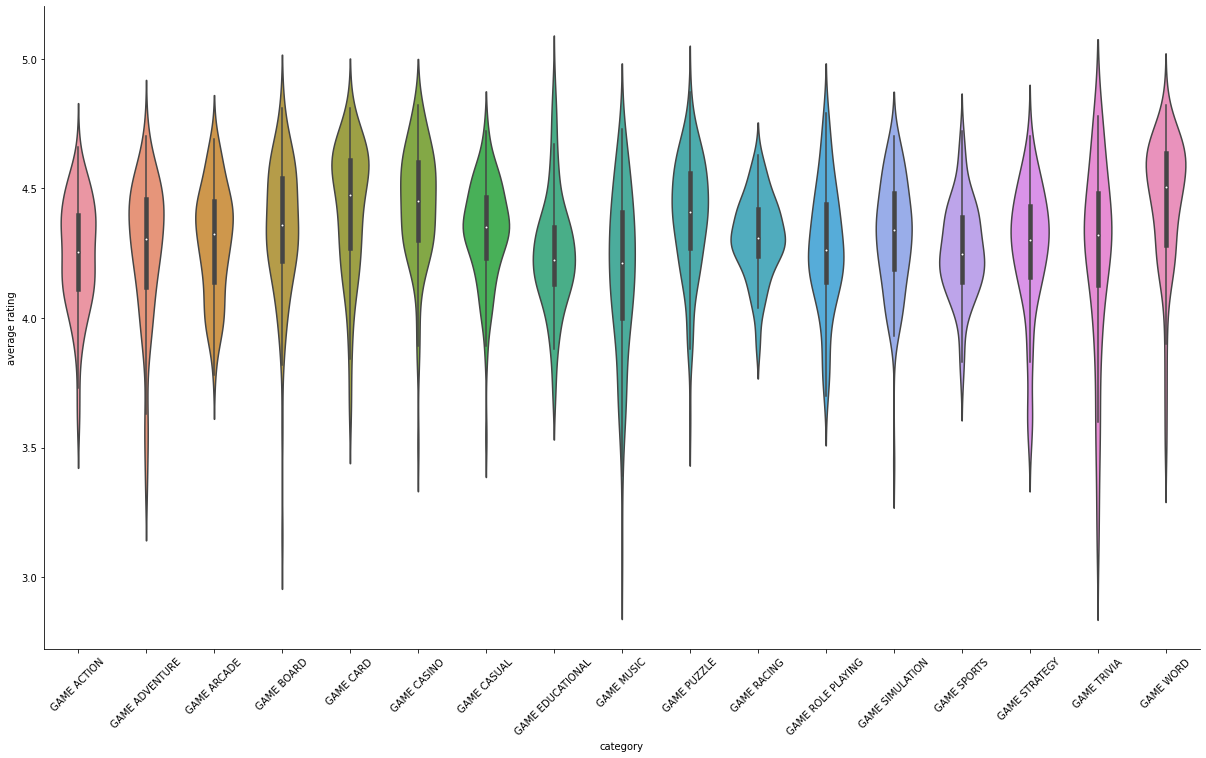

In [57]:
### 2) catplot이용


s = sns.catplot(x='category' ,y='average rating', data=games_df, kind='violin') #default =strip모양
s.fig.set_size_inches(20,10)
plt.xticks(rotation=45)
plt.show()

In [58]:
### 다운로드수별 평균평점 알아보기 

hm = games_df.groupby(["installs"])["average rating"].mean().sort_values(ascending=False)
hm

installs
100.0 k     4.645000
500.0 k     4.574615
1000.0 M    4.500000
1.0 M       4.387382
5.0 M       4.358387
10.0 M      4.295245
500.0 M     4.291000
50.0 M      4.284774
100.0 M     4.276798
Name: average rating, dtype: float64

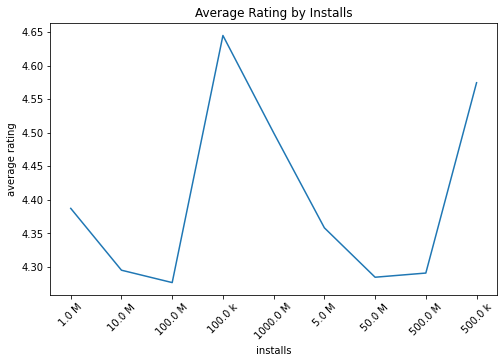

In [77]:
plt.figure(figsize=(8,5))
games_df.groupby(["installs"])["average rating"].mean().plot()

plt.xticks(rotation=45)
plt.ylabel("average rating")
plt.title("Average Rating by Installs")

plt.show()

## Conclusion

- 평점과 다운로드수는 관계가 없다
- 제일 평점이 평균적으로 높은 카테고리는 WORD이다.